## Mini Project III

In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA


## Plotting Methods

In [387]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [388]:
# Plot distortion
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [428]:
# Read files:
customer = pd.read_csv("./mini-project-III/twm_customer.csv", delimiter=';')

In [374]:
customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


- do they have savings account? How much do they save?
- do they have credit account? How much do they live in debt?
- are they making lot of small transactions or few huge ones?

In [502]:
# Read files:
accounts = pd.read_csv("./mini-project-III/twm_accounts.csv", delimiter=';')
checking_accounts = pd.read_csv("./mini-project-III/twm_checking_acct.csv", delimiter=';')
checking_trans = pd.read_csv("./mini-project-III/twm_checking_tran.csv", delimiter=';')
credit_accounts = pd.read_csv("./mini-project-III/twm_credit_acct.csv", delimiter=';')
credit_trans = pd.read_csv("./mini-project-III/twm_credit_tran.csv", delimiter=';')
saving_accounts = pd.read_csv("./mini-project-III/twm_savings_acct.csv", delimiter=';')
saving_trans = pd.read_csv("./mini-project-III/twm_savings_tran.csv", delimiter=';')
transactions = pd.read_csv("./mini-project-III/twm_transactions.csv", delimiter=';')

In [18]:
transactions.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [39]:
transactions.describe()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_time
count,77580.000000,7.758000e+04,77580.000000,77580.000000,77580.000000,77580.000000,77580.000000
mean,38.228332,1.185674e+15,-7.748275,-8.509662,0.762784,571.571177,104277.077984
std,27.838521,2.000564e+15,312.684674,311.006502,4.427059,2158.948572,87527.030938
min,1.000000,1.362480e+07,-3312.410000,-3312.410000,0.000000,-17300.000000,0.000000
25%,15.000000,1.362824e+07,-100.000000,-100.000000,0.000000,0.000000,0.000000
50%,32.000000,1.363199e+07,-1.815000,-1.815000,0.000000,180.400000,110626.000000
75%,59.000000,4.561143e+15,0.170000,0.000000,0.000000,957.252500,184245.250000
max,155.000000,4.561143e+15,17464.520000,17300.000000,164.520000,29868.390000,235959.000000


In [45]:
saving_trans.columns

Index(['cust_id', 'tran_id', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')

In [46]:
transactions.columns

Index(['tran_id', 'acct_nbr', 'tran_amt', 'principal_amt', 'interest_amt',
       'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'],
      dtype='object')

- mean of transaction amt per cust id
- Drop end dates
- keep closed acounts - yes
- split to withdrawal/deposit
- balance for k-means?
- count transactions as a new feature
- drop the marital status
- age range and income range and gender, children, 


In [429]:
customer_clean = customer

In [430]:
customer_clean.drop(["name_prefix", 
               "marital_status",
               "first_name",
               "last_name",
               "street_name",
               "city_name","state_code", "street_nbr"],axis=1, inplace=True)

In [431]:
customer_clean.columns

Index(['cust_id', 'income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'postal_code'],
      dtype='object')

In [411]:
customer_clean.describe()

,cust_id,income,age,years_with_bank,nbr_children,gender
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,0.0
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,NaN
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,NaN
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,NaN
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,NaN
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,NaN
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,NaN
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,NaN


In [432]:
# Set dummy columns
customer_clean['gender'] = customer_clean['gender'].apply(lambda x: 0 if x=='M' else 1)
customer_clean.tail()

,cust_id,income,age,years_with_bank,nbr_children,gender,postal_code
742,1363324,14795,36,6,1,1,90016
743,1362895,26387,56,6,1,1,10126
744,1362569,61300,50,0,2,1,87194
745,1363364,15100,37,7,0,1,35241
746,1363303,17875,18,3,0,1,90029


In [433]:
# missing data
total = customer_clean.isnull().sum().sort_values(ascending=False)
percent = (customer_clean.isnull().sum()/customer_clean.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
postal_code,0,0.0
gender,0,0.0
nbr_children,0,0.0
years_with_bank,0,0.0
age,0,0.0
income,0,0.0
cust_id,0,0.0


In [59]:
# There are no correlated columns
# step 1 Calculate a correlation matrix
df_corr = customer_clean.corr().abs()

# step 2 Get pairs of highly correlated features
indices = np.where(df_corr > 0.8) 
indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                    if x != y and x < y]
print(indices)

[]


## K Means on all columns

In [441]:
X = customer_clean.to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)
km = KMeans(n_clusters=15, random_state=0)
y_km = km.fit_predict(X)
print(len(y_km))

747


## Elbow Graph

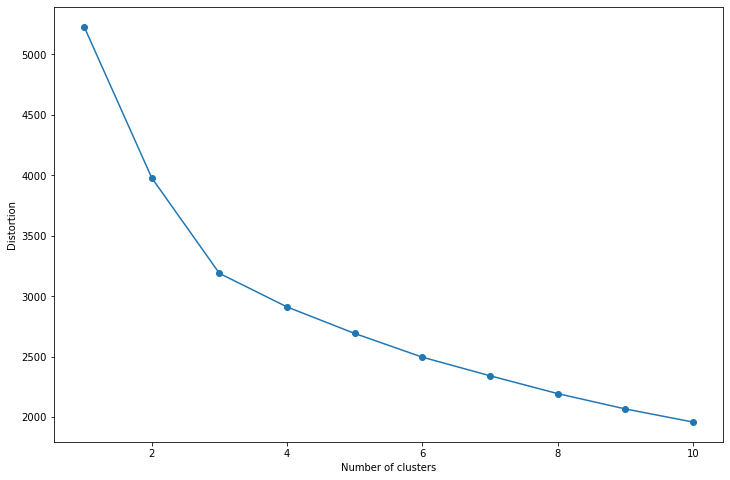

In [454]:
plot_distortion(X,max_clusters = 10)

## Radar Plot of K Means Clusters

In [439]:
y_km
customer_clean['cluster'] = y_km.tolist()
customer_clean.head()


,cust_id,income,age,years_with_bank,nbr_children,gender,postal_code,cluster
0,1362691,26150,46,5,1,1,89194,1
1,1362487,6605,71,1,0,1,90159,0
2,1363160,18548,38,8,0,1,90024,0
3,1362752,47668,54,3,0,1,90172,0
4,1362548,44554,59,9,2,1,10138,0


In [443]:
# Take the mean of each cluster
customer_mean = customer_clean.groupby(by='cluster').agg('mean')
customer_mean

,cust_id,income,age,years_with_bank,nbr_children,gender,postal_code
cluster,,,,,,,
0,1.362975e+06,22369.296703,60.945055,5.003663,0.164835,1.0,52244.589744
1,1.362979e+06,39171.928571,41.611607,3.308036,2.026786,1.0,63558.986607
2,1.363019e+06,8386.784000,23.092000,3.248000,0.140000,1.0,63794.096000


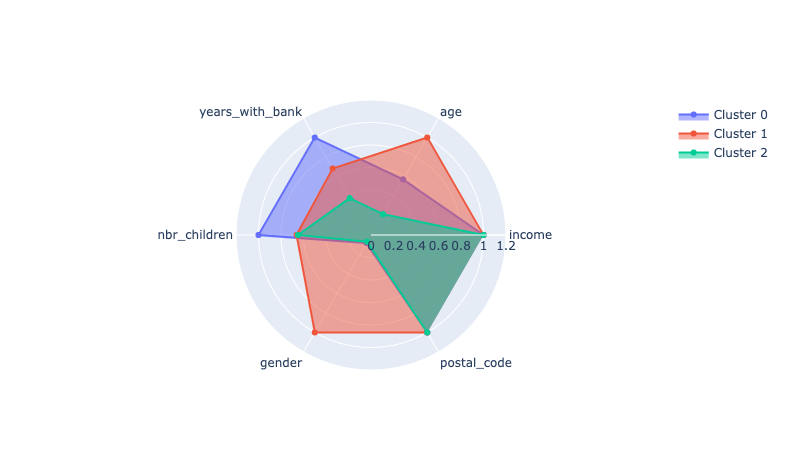

In [455]:
# Panda group by cluster and mean for each column
categories = ['income', 'age', 'years_with_bank','nbr_children','gender','postal_code']

customer_mean = customer_mean.apply(lambda x: (x/x.max()), axis=0)
fig = go.Figure()

for index, row in customer_mean.iterrows():
    fig.add_trace(go.Scatterpolar(
          r=row,
          theta=categories,
          fill='toself',
          name='Cluster '+str(index)
    ))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1.2]
    )),
  showlegend=True
)

fig.show()




# Account Behaviour

In [206]:
accounts.head()
transactions[transactions['acct_nbr'] == 4561143213627090].head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
894,13,4561143213627090,-238.97,-238.97,0.0,-764.96,2.4.1995,215757,E,CG
1757,26,4561143213627090,-63.58,-63.58,0.0,-276.46,27.6.1995,123618,E,CG
2615,39,4561143213627090,-120.00,-120.00,0.0,-462.27,29.9.1995,164505,A,CA
3246,52,4561143213627090,-148.45,-148.45,0.0,-148.45,7.12.1995,215614,E,CG
5976,2,4561143213627090,0.00,0.00,0.0,0.00,6.1.1995,93520,A,IQ


In [262]:
# Get the credit card balance, checking balance and savings balance
acct1 = pd.pivot_table(accounts, values='ending_balance', index=['cust_id'],
                    columns=['acct_type'], aggfunc=np.sum)
acct1.head()

acct_type,CC,CK,SV
cust_id,,,
1362480,20.00,86.86,1187.97
1362484,369.72,95.32,2122.17
1362485,1100.00,45.49,NaN
1362486,NaN,3312.27,116.24
1362487,1548.23,1401.21,12.89


In [263]:
# Clean the nan by replacing with 0
#acct1.columns
acct1["CC  "] = acct1["CC  "].fillna(0.00)
acct1["CK  "] = acct1["CK  "].fillna(0.00)
acct1["SV  "] = acct1["SV  "].fillna(0.00)

In [264]:
acct1.head()

acct_type,CC,CK,SV
cust_id,,,
1362480,20.00,86.86,1187.97
1362484,369.72,95.32,2122.17
1362485,1100.00,45.49,0.00
1362486,0.00,3312.27,116.24
1362487,1548.23,1401.21,12.89


In [267]:
acct1 = acct1.reset_index()
acct1.head()

acct_type,cust_id,CC,CK,SV
0,1362480,20.00,86.86,1187.97
1,1362484,369.72,95.32,2122.17
2,1362485,1100.00,45.49,0.00
3,1362486,0.00,3312.27,116.24
4,1362487,1548.23,1401.21,12.89


In [269]:
acct1 = acct1.set_index('cust_id')
acct1.head()

acct_type,CC,CK,SV
cust_id,,,
1362480,20.00,86.86,1187.97
1362484,369.72,95.32,2122.17
1362485,1100.00,45.49,0.00
1362486,0.00,3312.27,116.24
1362487,1548.23,1401.21,12.89


In [485]:
saving_accounts.columns

Index(['cust_id', 'acct_nbr', 'minimum_balance', 'acct_type', 'account_active',
       'acct_start_date', 'acct_end_date', 'starting_balance',
       'ending_balance'],
      dtype='object')

In [490]:
accounts.shape

(1409, 8)

In [503]:
accounts = pd.merge(saving_accounts[['cust_id', 'account_active', 'minimum_balance']], 
                    accounts, how="right", on="cust_id", suffixes=('', '_sv'))
accounts.columns

Index(['cust_id', 'account_active', 'minimum_balance', 'acct_nbr', 'acct_type',
       'account_active_sv', 'acct_start_date', 'acct_end_date',
       'starting_balance', 'ending_balance'],
      dtype='object')

In [504]:
accounts = pd.merge(checking_accounts[['cust_id', 'account_active', 'minimum_balance']], 
                    accounts, how="right", on="cust_id", suffixes=('', '_ch'))
accounts.columns

Index(['cust_id', 'account_active', 'minimum_balance', 'account_active_ch',
       'minimum_balance_ch', 'acct_nbr', 'acct_type', 'account_active_sv',
       'acct_start_date', 'acct_end_date', 'starting_balance',
       'ending_balance'],
      dtype='object')

In [495]:
credit_accounts.columns

Index(['cust_id', 'acct_nbr', 'credit_limit', 'credit_rating',
       'account_active', 'acct_start_date', 'acct_end_date',
       'starting_balance', 'ending_balance'],
      dtype='object')

In [505]:
accounts = pd.merge(credit_accounts[['cust_id', 'account_active', 'credit_limit', 'credit_rating']], accounts, 
                    how="right", on="cust_id", suffixes=('', '_cc'))
accounts.shape

(1409, 15)

In [506]:
accounts.columns

Index(['cust_id', 'account_active', 'credit_limit', 'credit_rating',
       'account_active_cc', 'minimum_balance', 'account_active_ch',
       'minimum_balance_ch', 'acct_nbr', 'acct_type', 'account_active_sv',
       'acct_start_date', 'acct_end_date', 'starting_balance',
       'ending_balance'],
      dtype='object')

In [507]:
accounts['savings'] = accounts['ending_balance'] - accounts['starting_balance']
accounts.head()       

,cust_id,account_active,credit_limit,credit_rating,account_active_cc,minimum_balance,account_active_ch,minimum_balance_ch,acct_nbr,acct_type,account_active_sv,acct_start_date,acct_end_date,starting_balance,ending_balance,savings
0,1363160,Y,1000.0,0.0,NaN,NaN,Y,100.0,4561143213631600,CC,Y,12.10.1988,NaN,657.46,286.69,-370.77
1,1363160,Y,1000.0,0.0,NaN,NaN,Y,100.0,13631603,SV,Y,9.5.1988,NaN,113.04,122.54,9.50
2,1362487,Y,3000.0,0.0,Y,3000.0,N,500.0,4561143213624870,CC,Y,8.8.1995,NaN,0.00,1548.23,1548.23
3,1362487,Y,3000.0,0.0,Y,3000.0,N,500.0,13624873,SV,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
4,1362487,Y,3000.0,0.0,Y,3000.0,N,500.0,13624872,CK,Y,12.1.1995,NaN,2781.07,1401.21,-1379.86


## Remove NaN and code numeric

In [518]:
total = accounts.isnull().sum().sort_values(ascending=False)
percent = (accounts.isnull().sum()/accounts.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
account_active,1409,1.000000
account_active_ch,376,0.266856
account_active_cc,190,0.134847
savings,0,0.000000
ending_balance,0,0.000000
starting_balance,0,0.000000
account_active_sv,0,0.000000
acct_type,0,0.000000
acct_nbr,0,0.000000
minimum_balance_ch,0,0.000000


In [517]:
accounts["minimum_balance_ch"] = accounts["minimum_balance_ch"].fillna(0.0)
accounts["credit_rating"] = accounts["credit_rating"].fillna(0.0)
accounts["credit_limit"] = accounts["credit_limit"].fillna(0.0)
accounts["minimum_balance_ch"] = accounts["minimum_balance_ch"].fillna(0.0)
accounts["minimum_balance"] = accounts["minimum_balance"].fillna(0.0)

In [522]:
accounts.drop(['account_active', 'account_active_cc', 
               'account_active_ch', 'account_active_sv'],axis=1, inplace=True)
accounts.columns

KeyError: "['account_active' 'account_active_cc' 'account_active_ch'\n 'account_active_sv'] not found in axis"

In [514]:
#accounts['savings'] = accounts.iloc(accounts['account_type' == 'CC']) savings * -1
#accounts['savings'][accounts.acct_type == 'CC'] = (accounts['savings'] * -1)

<ipython-input-514-421b4e91f35c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [523]:
accounts.head()

,cust_id,credit_limit,credit_rating,minimum_balance,minimum_balance_ch,acct_nbr,acct_type,starting_balance,ending_balance,savings
0,1363160,1000.0,0.0,0.0,100.0,4561143213631600,CC,657.46,286.69,-370.77
1,1363160,1000.0,0.0,0.0,100.0,13631603,SV,113.04,122.54,9.50
2,1362487,3000.0,0.0,3000.0,500.0,4561143213624870,CC,0.00,1548.23,1548.23
3,1362487,3000.0,0.0,3000.0,500.0,13624873,SV,651.73,12.89,-638.84
4,1362487,3000.0,0.0,3000.0,500.0,13624872,CK,2781.07,1401.21,-1379.86


In [553]:
#Chequing and savings accts by cust_id
ac1 = accounts.pivot(index='cust_id', columns='acct_type', values='cust_id')
ac1 = ac1 > 0
ac1
f = lambda x: 1 if x==True else 0
ac1 = ac1.applymap(f)
ac1.head(30)

acct_type,CC,CK,SV
cust_id,,,
1362480,1,1,1
1362484,1,1,1
1362485,1,1,0
1362486,0,1,1
1362487,1,1,1
1362488,0,1,0
1362489,1,1,1
1362492,1,1,0
1362496,0,0,1


In [554]:
accounts.drop(['CC  ', 'CK  ', 'SV  '],axis=1, inplace=True)

In [555]:
accounts = pd.merge(ac1, accounts, how="right", on="cust_id", suffixes=('', '_ch'))
accounts.columns

Index(['cust_id', 'CC  ', 'CK  ', 'SV  ', 'credit_limit', 'credit_rating',
       'minimum_balance', 'minimum_balance_ch', 'acct_nbr', 'acct_type',
       'starting_balance', 'ending_balance', 'savings'],
      dtype='object')

In [556]:
accounts.head(20)

,cust_id,CC,CK,SV,credit_limit,credit_rating,minimum_balance,minimum_balance_ch,acct_nbr,acct_type,starting_balance,ending_balance,savings
0,1362480,1,1,1,2500.0,0.0,100.0,100.0,13624802,CK,331.85,86.86,-244.99
1,1362480,1,1,1,2500.0,0.0,100.0,100.0,4561143213624800,CC,1607.40,20.00,-1587.40
2,1362480,1,1,1,2500.0,0.0,100.0,100.0,13624803,SV,707.09,1187.97,480.88
3,1362484,1,1,1,3000.0,0.0,3000.0,100.0,13624842,CK,2613.46,95.32,-2518.14
4,1362484,1,1,1,3000.0,0.0,3000.0,100.0,4561143213624840,CC,1278.78,369.72,-909.06
5,1362484,1,1,1,3000.0,0.0,3000.0,100.0,13624843,SV,194.76,2122.17,1927.41
6,1362485,1,1,0,1100.0,0.0,100.0,0.0,4561143213624850,CC,282.38,1100.00,817.62
7,1362485,1,1,0,1100.0,0.0,100.0,0.0,13624852,CK,209.78,45.49,-164.29
8,1362486,0,1,1,0.0,0.0,3000.0,100.0,13624862,CK,4252.39,3312.27,-940.12
9,1362486,0,1,1,0.0,0.0,3000.0,100.0,13624863,SV,284.48,116.24,-168.24


In [552]:
accounts.drop(['has_checking',
       'has_saving', 'has_credit'],axis=1, inplace=True)

In [512]:
#categorical_cols = ['acct_type']
# Get dummies
#accounts = pd.get_dummies(accounts, columns=categorical_cols)

,cust_id,account_active,credit_limit,credit_rating,account_active_cc,minimum_balance,account_active_ch,minimum_balance_ch,acct_nbr,acct_type,account_active_sv,starting_balance,ending_balance,savings
0,1363160,NaN,1000.0,0.0,NaN,NaN,Y,100.0,4561143213631600,CC,Y,657.46,286.69,-370.77
1,1363160,NaN,1000.0,0.0,NaN,NaN,Y,100.0,13631603,SV,Y,113.04,122.54,9.50
2,1362487,NaN,3000.0,0.0,Y,3000.0,N,500.0,4561143213624870,CC,Y,0.00,1548.23,1548.23
3,1362487,NaN,3000.0,0.0,Y,3000.0,N,500.0,13624873,SV,N,651.73,12.89,-638.84
4,1362487,NaN,3000.0,0.0,Y,3000.0,N,500.0,13624872,CK,Y,2781.07,1401.21,-1379.86


In [557]:
accounts = pd.merge(acct1, accounts, how="right", on="cust_id", suffixes=('', '_ch'))
accounts.head()

,cust_id,CC,CK,SV,CC _ch,CK _ch,SV _ch,credit_limit,credit_rating,minimum_balance,minimum_balance_ch,acct_nbr,acct_type,starting_balance,ending_balance,savings
0,1362480,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,13624802,CK,331.85,86.86,-244.99
1,1362480,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,4561143213624800,CC,1607.40,20.00,-1587.40
2,1362480,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,13624803,SV,707.09,1187.97,480.88
3,1362484,369.72,95.32,2122.17,1,1,1,3000.0,0.0,3000.0,100.0,13624842,CK,2613.46,95.32,-2518.14
4,1362484,369.72,95.32,2122.17,1,1,1,3000.0,0.0,3000.0,100.0,4561143213624840,CC,1278.78,369.72,-909.06


In [558]:
# Join accounts to transactions by account id
trans1 = pd.merge(transactions, accounts, how="inner", on="acct_nbr")
trans1 = trans1[['cust_id','tran_amt','tran_code']]
trans1.head()

,cust_id,tran_amt,tran_code
0,1362562,0.00,IQ
1,1362562,140.63,DP
2,1362562,0.49,IN
3,1362562,-120.00,WD
4,1362562,-140.00,WD


In [559]:
# Drop the zero value transactions
trans_clean = trans1.drop(trans1[(trans1['tran_amt'] <= 0.01)].index)
trans_clean.head()


,cust_id,tran_amt,tran_code
1,1362562,140.63,DP
2,1362562,0.49,IN
6,1362562,0.49,IN
7,1362562,451.49,DP
8,1362562,574.71,DP


In [560]:
trans_clean.drop(['tran_code'],axis = 1,inplace=True)
trans_clean.describe()

,cust_id,tran_amt
count,2.014500e+04,20145.000000
mean,1.362989e+06,253.949411
std,2.945214e+02,460.358597
min,1.362480e+06,0.020000
25%,1.362727e+06,2.880000
50%,1.362980e+06,121.310000
75%,1.363253e+06,295.930000
max,1.363495e+06,17464.520000


In [561]:
# Switch everythong to absolute value
trans_clean['tran_amt_abs'] = (abs(trans_clean['tran_amt']))
trans_clean.head()

,cust_id,tran_amt,tran_amt_abs
1,1362562,140.63,140.63
2,1362562,0.49,0.49
6,1362562,0.49,0.49
7,1362562,451.49,451.49
8,1362562,574.71,574.71


In [562]:
trans_clean.describe()

,cust_id,tran_amt,tran_amt_abs
count,2.014500e+04,20145.000000,20145.000000
mean,1.362989e+06,253.949411,253.949411
std,2.945214e+02,460.358597,460.358597
min,1.362480e+06,0.020000,0.020000
25%,1.362727e+06,2.880000,2.880000
50%,1.362980e+06,121.310000,121.310000
75%,1.363253e+06,295.930000,295.930000
max,1.363495e+06,17464.520000,17464.520000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tran_amt_abs', ylabel='Density'>

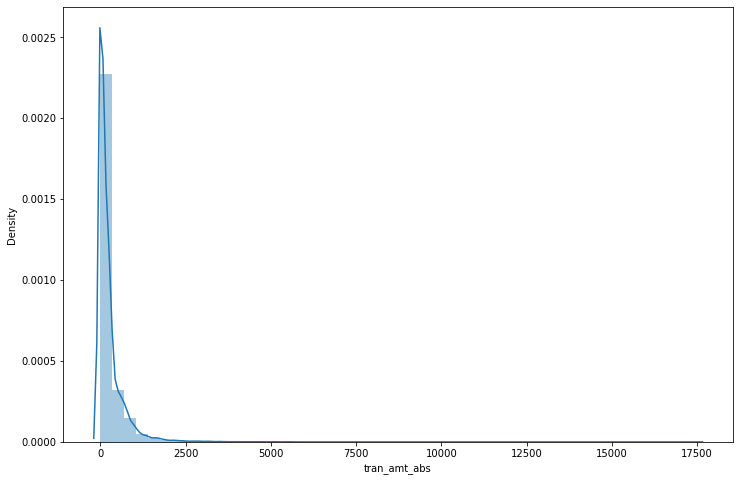

In [298]:
# histogram
sns.distplot(trans_clean['tran_amt_abs'])

In [563]:
# Count transactions that are small (< $12)
trans_sm = trans_clean[trans_clean['tran_amt_abs'] < 20][['cust_id','tran_amt_abs']].groupby(by=["cust_id"]).count()
trans_sm = trans_sm.rename({"tran_amt_abs": "sm_tran"}, axis='columns')
trans_sm = trans_sm.reset_index()
trans_sm.max()

cust_id    1363495
sm_tran         29
dtype: int64

In [564]:
# Count transactions that are large (> $1000)
trans_lg = trans_clean[trans_clean['tran_amt_abs'] > 500][['cust_id','tran_amt_abs']].groupby(by=["cust_id"]).count()
trans_lg = trans_lg.rename({"tran_amt_abs": "lg_tran"}, axis='columns')
trans_lg = trans_lg.reset_index()
trans_lg.max()

cust_id    1363495
lg_tran         32
dtype: int64

In [302]:
# Join all data tables together
#trans_sm, trans_lg, trans_mean, acct1
acct1_res = acct1.reset_index()

In [565]:
acct_stats = pd.merge(pd.merge(pd.merge(trans_sm,trans_lg,on='cust_id'),trans_mean,on='cust_id'), accounts,on='cust_id')

In [334]:
acct_stats['SAV'] = (acct_stats['CK  '] + acct_stats['SV  '])

In [335]:
acct_stats['WORTH'] = (acct_stats['SAV'] - acct_stats['CC  '])

In [567]:
acct_stats.drop(['acct_type'],axis=1, inplace=True)

In [568]:
acct_stats.head()

,cust_id,sm_tran,lg_tran,mean_tran,CC,CK,SV,CC _ch,CK _ch,SV _ch,credit_limit,credit_rating,minimum_balance,minimum_balance_ch,acct_nbr,starting_balance,ending_balance,savings
0,1362480,12,6,317.009318,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,13624802,331.85,86.86,-244.99
1,1362480,12,6,317.009318,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,4561143213624800,1607.40,20.00,-1587.40
2,1362480,12,6,317.009318,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,13624803,707.09,1187.97,480.88
3,1362484,16,7,193.708246,369.72,95.32,2122.17,1,1,1,3000.0,0.0,3000.0,100.0,13624842,2613.46,95.32,-2518.14
4,1362484,16,7,193.708246,369.72,95.32,2122.17,1,1,1,3000.0,0.0,3000.0,100.0,4561143213624840,1278.78,369.72,-909.06


## K Means on All Columns

In [576]:
acct_stats.columns

Index(['cust_id', 'sm_tran', 'lg_tran', 'mean_tran', 'CC  ', 'CK  ', 'SV  ',
       'CC  _ch', 'CK  _ch', 'SV  _ch', 'credit_limit', 'credit_rating',
       'minimum_balance', 'minimum_balance_ch', 'acct_nbr', 'starting_balance',
       'ending_balance', 'savings', 'cluster'],
      dtype='object')

In [579]:
X = acct_stats[['sm_tran', 'lg_tran', 'mean_tran', 'CC  ', 'CK  ', 'SV  ',
       'CC  _ch', 'CK  _ch', 'SV  _ch', 'credit_limit', 'credit_rating',
       'minimum_balance', 'minimum_balance_ch', 'starting_balance',
       'ending_balance', 'savings']].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)
km = KMeans(n_clusters=10, random_state=0)
y_km = km.fit_predict(X)
print(len(y_km))

1112


## Elbow Graph

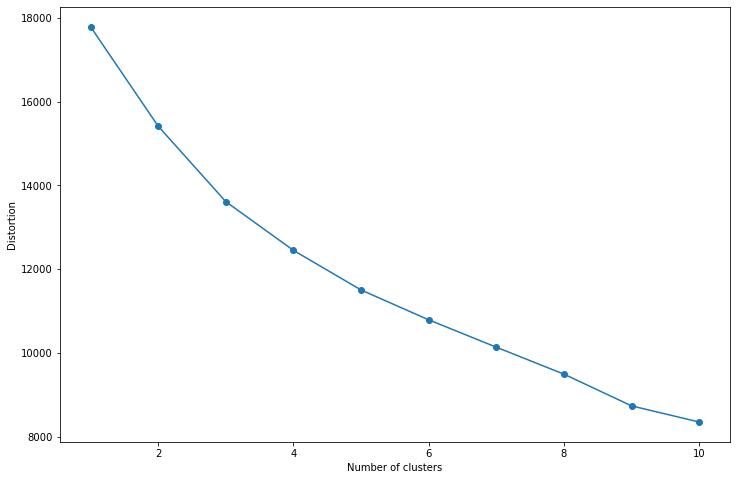

In [580]:
plot_distortion(X,max_clusters = 10)

## Radar Plot of K Means

In [581]:
# Use 3 categories
km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(X)

In [582]:
y_km
acct_stats['cluster'] = y_km.tolist()
acct_stats.head()

,cust_id,sm_tran,lg_tran,mean_tran,CC,CK,SV,CC _ch,CK _ch,SV _ch,credit_limit,credit_rating,minimum_balance,minimum_balance_ch,acct_nbr,starting_balance,ending_balance,savings,cluster
0,1362480,12,6,317.009318,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,13624802,331.85,86.86,-244.99,1
1,1362480,12,6,317.009318,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,4561143213624800,1607.40,20.00,-1587.40,1
2,1362480,12,6,317.009318,20.00,86.86,1187.97,1,1,1,2500.0,0.0,100.0,100.0,13624803,707.09,1187.97,480.88,1
3,1362484,16,7,193.708246,369.72,95.32,2122.17,1,1,1,3000.0,0.0,3000.0,100.0,13624842,2613.46,95.32,-2518.14,1
4,1362484,16,7,193.708246,369.72,95.32,2122.17,1,1,1,3000.0,0.0,3000.0,100.0,4561143213624840,1278.78,369.72,-909.06,1


In [583]:
# Take the mean of each cluster
acct_stats_mean = acct_stats.groupby(by='cluster').agg('mean')
acct_stats_mean

,cust_id,sm_tran,lg_tran,mean_tran,CC,CK,SV,CC _ch,CK _ch,SV _ch,credit_limit,credit_rating,minimum_balance,minimum_balance_ch,acct_nbr,starting_balance,ending_balance,savings
cluster,,,,,,,,,,,,,,,,,,
0,1.363004e+06,13.242424,14.242424,507.176901,2230.953561,1300.196667,3469.369394,0.916667,0.931818,0.909091,6292.424242,0.500000,1636.363636,196.969697,1.520381e+15,4065.888182,2778.202273,-1287.685909
1,1.362992e+06,14.762029,4.394018,190.232019,818.593225,533.173043,890.849012,0.875163,0.895969,1.000000,1791.287386,0.265280,1248.764629,181.144343,1.393847e+15,997.361625,806.234135,-191.127490
2,1.363000e+06,4.791469,5.075829,301.981195,796.663697,546.671469,12.929005,0.800948,0.990521,0.004739,1716.587678,0.109005,1696.208531,0.473934,1.837427e+15,1844.036114,698.533318,-1145.502796


In [575]:
acct_stats_mean.columns

Index(['cust_id', 'sm_tran', 'lg_tran', 'mean_tran', 'CC  ', 'CK  ', 'SV  ',
       'CC  _ch', 'CK  _ch', 'SV  _ch', 'credit_limit', 'credit_rating',
       'minimum_balance', 'minimum_balance_ch', 'acct_nbr', 'starting_balance',
       'ending_balance', 'savings'],
      dtype='object')

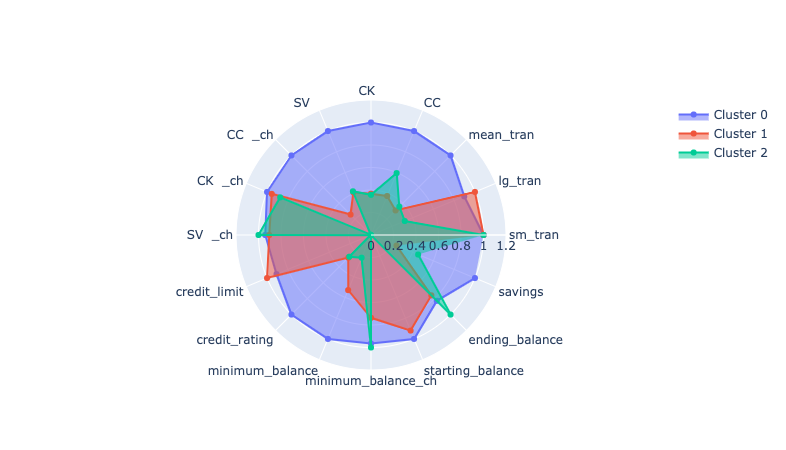

In [584]:
# Panda group by cluster and mean for each column
categories = ['sm_tran', 'lg_tran', 'mean_tran', 'CC  ', 'CK  ', 'SV  ',
       'CC  _ch', 'CK  _ch', 'SV  _ch', 'credit_limit', 'credit_rating',
       'minimum_balance', 'minimum_balance_ch', 'starting_balance',
       'ending_balance', 'savings']

acct_stats_mean = acct_stats_mean.apply(lambda x: (x/x.max()), axis=0)
fig = go.Figure()

for index, row in acct_stats_mean.iterrows():
    fig.add_trace(go.Scatterpolar(
          r=row,
          theta=categories,
          fill='toself',
          name='Cluster '+str(index)
    ))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1.2]
    )),
  showlegend=True
)

fig.show()

In [586]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pc_df = pd.DataFrame(principalComponents, columns = ['PC1','PC2'])

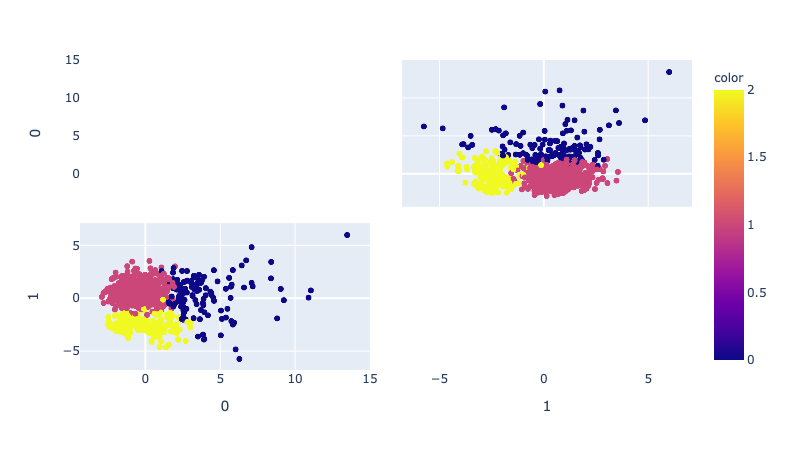

In [587]:
#labels = {
 #   str(i): f"PC {i+1} ({var:.1f}%)"
 #   for i, var in enumerate(pca_ufo.explained_variance_ratio_ * 100)
#}
fig = px.scatter_matrix(
    principalComponents,
#    labels=labels,
    dimensions=range(2),
    color=acct_stats["cluster"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [588]:

pc_df['cluster'] = y_km.tolist()
pc_df.head()


,PC1,PC2,cluster
0,-0.518560,-0.086703,1
1,-0.235961,-0.393025,1
2,-0.285620,0.151046,1
3,0.362491,-0.089161,1
4,0.094117,0.291165,1


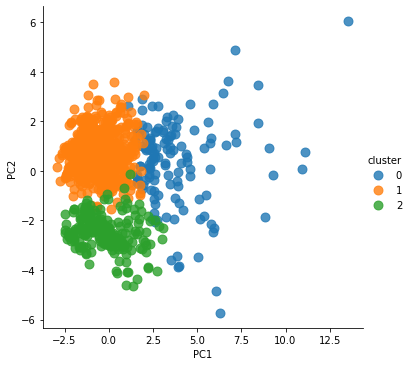

In [589]:
sns.lmplot(x='PC1', y='PC2', 
           data=pc_df, 
           fit_reg=False, 
           hue='cluster', 
           legend=True, scatter_kws={"s": 80})